# Project: Investigate a Dataset - Medical Appointment No Shows

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#reference">References</a></li>
</ul>


<a id='intro'></a>

## Introduction

The dataset includes information on over 110,000 medical appointments in Brazil, covering 14 variables related to patient demographics, scheduling, and health conditions. A major focus is on whether patients attended their appointments, aiming to identify factors that could reduce missed appointments and improve healthcare services. This dataset, provided by Joni Hoppen and Aquarela Analytics, also includes socioital and conomic details, like whether a patient is part of Bolsa Família, a social welfare program in Brazil.

### Dataset Description

Each variable offers valuable information for analysis, with **obvious names** that clarify their content. The only variable which need clarification is the **Scholarship**

Now let's describe each variable meaning:

- **PatientID** is a **numeric** column identifies a patient.

- **AppointmentID** is a **numeric** column identifies a appointment.

- **Gender** is a **string** column shows whether the gender Male or Female.

- **ScheduledDay** is a **string** column shows the day of the actuall appointment, when they have to visit the doctor.

- **AppointmentDay** is a **string** column shows the day someone called or registered the appointment, this is before appointment of course.

- **Age** is a **numeric** column shows how old patient is.

- **Neighbourhood** is a **string** column shows where the appointment takes place.

- **Scholarship** is a **True/False** column, refers to whether a patient receives benefits from Brazil’s Bolsa Família program. This program provides financial aid to **low-income families** on the condition that children stay in school and are vaccinated. The program aims to support families in meeting basic needs while promoting children's education and health. It has improved school attendance, nutrition, and reduced child labor rates in Brazil.

- **Hipertension** is a **True/False** column, shows if the patient has Hipertension or not.

- **Diabetes** is a **True/False** column, shows if the patient has Diabetes or not.

- **Alcoholism** is a **True/False** column, shows if the patient has Alcoholism or not.

- **Handcap** is a **numeric** column, Originally assumed to be a boolean attribute (indicating whether a patient has a disability), it was clarified through the [Kaggle Discussion Section](https://www.kaggle.com/datasets/joniarroba/noshowappointments/discussion/29699) that this attribute represents a count of disabilities. Specifically:

  - Handcap = 0 indicates no disabilities.
  - Handcap = 1 indicates a single disability (though the type is unspecified).
  - Higher values (e.g., Handcap = 2, 3, 4) indicate multiple disabilities.

- **SMS_received** is a **numeric** column, shows how many messages sent to the patient.

- **No-show** is a **True/False** column, shows if the patient appeared in the appoinment or not.

### Question(s) for Analysis

The **Primary Question** is:

- What are the most significant factors affecting patient no-shows?

**Detailed Sub-Questions**:

- How does the time between scheduling and appointment day affect the likelihood of a no-show?
- Are specific demographics (age, gender, neighborhood) more likely to miss appointments?
- Does receiving an SMS reminder reduce no-show rates?

**Statistical Questions**:

- What statistical relationship exists between social factors (like scholarship status) and appointment attendance?
- What are the age and gender distributions for those who show up vs. no-show?

**Data Wrangling and Cleaning Questions**

- Are there any missing values in the data, and how should they be handled?
- Is any variable transformation needed to make analysis easier?


In [4142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4143]:
from dataset_setup import setup

<a id='wrangling'></a>

## Data Wrangling

> Note that I've kept the process as it is here once I started until I end, even though I found some enhancements in the dataset, like the type of handcap... etc. The goal of keeping the process is to show you how I was investigating the dataset.


Now Let's start exploring the dataset. First things first, we need to load the dataset.


In [4144]:
df = pd.read_csv("KaggleV2-May-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The dataset were loaded successfully without any missing column.

The numbers on the Patient ID and Appointment ID looks confusing in the scientific notation so lets reformat it.


In [4145]:
pd.options.display.float_format = "{:.0f}".format
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3596266328735,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,15576631729893,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,92134931435557,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


Looks better Now.

I note that the columns are in Snake case, this will be annoying when trying to handle the column so i'll rename then to be in lower case.


In [4146]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace("-", "_")
df.columns = df.columns.str.replace("id", "_id")
df.columns = df.columns.str.replace("day", "_day")

In [4147]:
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'no_show'],
      dtype='object')

**Questions:**

- Are there any missing values in the data, and how should they be handled?
- Can we reduce the Datatypes of the column to reduce the memory usage?
- Is the data entered valid?


In [4148]:
# check for missing values, duplicates and data types
df.info()

# df.dtypes, df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   patient_id       110527 non-null  float64
 1   appointment_id   110527 non-null  int64  
 2   gender           110527 non-null  object 
 3   scheduled_day    110527 non-null  object 
 4   appointment_day  110527 non-null  object 
 5   age              110527 non-null  int64  
 6   neighbourhood    110527 non-null  object 
 7   scholarship      110527 non-null  int64  
 8   hipertension     110527 non-null  int64  
 9   diabetes         110527 non-null  int64  
 10  alcoholism       110527 non-null  int64  
 11  handcap          110527 non-null  int64  
 12  sms_received     110527 non-null  int64  
 13  no_show          110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


So the dataset has **110527** entries, there's **no missing data** which is a good start. But we can address some **problems** here like:

- Patient ID can be represented in **Inteager** form instead of **float** form since there's no floating part in the ID's in general.
- Schedual and appointment days shold be represented as **timestamp** instead of **string**.
- scholarship, hipertension, diabetes, alcoholism, and handcap, should be all **boolean** columns instead of **inteagers**.


Now lets check if we can reduce the range of datatypes to reduce the memory usage. In the same time validate the data and its values.


In [4149]:
df.describe()

,patient_id,appointment_id,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,110527,110527,110527,110527,110527,110527,110527,110527,110527
mean,147496265710394,5675305,37,0,0,0,0,0,0
std,256094920291739,71296,23,0,0,0,0,0,0
min,39218,5030230,-1,0,0,0,0,0,0
25%,4172614444192,5640286,18,0,0,0,0,0,0
50%,31731838713978,5680573,37,0,0,0,0,0,0
75%,94391720898175,5725524,55,0,0,0,0,0,1
max,999981631772427,5790484,115,1,1,1,1,4,1


We have a few problems Here.

- **PatientID** The range from 39,218 to almost one quadrillion (999981631772427) seems unusual. This could suggest that PatientId includes a variety of formats or may not represent typical patient IDs (often not this large). It’s worth investigating if some IDs are outliers or generated in an inconsistent format.

- **Age** has two unusual events:

  - The minimum age is **-1**, which doesn't make sense. This likely indicates a data entry error.
  - Ages range up to 115, which is possible but uncommon. It may be valid if there are patients at that age, but we need to check for any inaccuracies.

- **Handcap** has a maximum value of 4, which weird since the Handcap was introduced as a **boolean** column in the description of the dataset.


Lets These problems first:


In [4150]:
(df["patient_id"].nunique(), df["patient_id"].count())

(62299, np.int64(110527))

The Patient IDs were reused which is logical since any patient can attend to visit multiple times.


<Axes: title={'center': 'Distribution of patient IDs'}, ylabel='Frequency'>

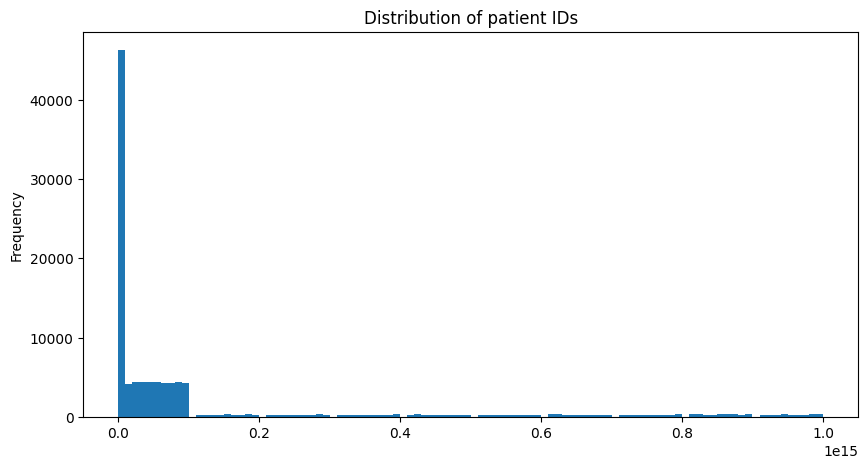

In [4151]:
df["patient_id"].plot(
    kind="hist", bins=100, figsize=(10, 5), title="Distribution of patient IDs"
)

The Distribution of the ID's highly skewed around 0, which means there's a little number of ID's consists of large number.


In [4152]:
df["handcap"].value_counts()

handcap
0    108286
1      2042
2       183
3        13
4         3
Name: count, dtype: int64

According to this [Discussion Section](https://www.kaggle.com/datasets/joniarroba/noshowappointments/discussion/29699), The handcap is numeric value which represent the number of disabilites the patient has, therfore we can treat it as a count of disabilities rather than a boolean type.


Check about the duplicates


In [4153]:
df.duplicated().sum()

np.int64(0)

In [4154]:
def cols_value_counts(df):
    value_counts = {col: df[col].value_counts().shape[0] for col in df.columns}
    return value_counts

In [4155]:
cols_value_counts(df)

{'patient_id': 62299,
 'appointment_id': 110527,
 'gender': 2,
 'scheduled_day': 103549,
 'appointment_day': 27,
 'age': 104,
 'neighbourhood': 81,
 'scholarship': 2,
 'hipertension': 2,
 'diabetes': 2,
 'alcoholism': 2,
 'handcap': 5,
 'sms_received': 2,
 'no_show': 2}

The other columns looks fine and without any issues.

Now lets step back and reduce the ranges of the columns.


In [4156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   patient_id       110527 non-null  float64
 1   appointment_id   110527 non-null  int64  
 2   gender           110527 non-null  object 
 3   scheduled_day    110527 non-null  object 
 4   appointment_day  110527 non-null  object 
 5   age              110527 non-null  int64  
 6   neighbourhood    110527 non-null  object 
 7   scholarship      110527 non-null  int64  
 8   hipertension     110527 non-null  int64  
 9   diabetes         110527 non-null  int64  
 10  alcoholism       110527 non-null  int64  
 11  handcap          110527 non-null  int64  
 12  sms_received     110527 non-null  int64  
 13  no_show          110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4157]:
df.describe()

,patient_id,appointment_id,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,110527,110527,110527,110527,110527,110527,110527,110527,110527
mean,147496265710394,5675305,37,0,0,0,0,0,0
std,256094920291739,71296,23,0,0,0,0,0,0
min,39218,5030230,-1,0,0,0,0,0,0
25%,4172614444192,5640286,18,0,0,0,0,0,0
50%,31731838713978,5680573,37,0,0,0,0,0,0
75%,94391720898175,5725524,55,0,0,0,0,0,1
max,999981631772427,5790484,115,1,1,1,1,4,1


- **Appointment ID** can be reduced to fit int32

- **age**, **handcap**, and **sms recived** can be reduced to fit int8

- **Gender** and **No-Show** can be represented as catigoral.


### Data Cleaning


After checking the issues, now everything is clear, we can start cleaning the dataset.


First we need to change the datatypes of the attributes.


In [4158]:
# changing the data types of the columns
df["appointment_day"] = pd.to_datetime(df["appointment_day"])
df["scheduled_day"] = pd.to_datetime(df["scheduled_day"])

In [4159]:
df["patient_id"] = df["patient_id"].astype(np.int64)
df["appointment_id"] = df["appointment_id"].astype(np.int32)
df["age"] = df["age"].astype(np.int8)
df["handcap"] = df["handcap"].astype(np.int8)
df["sms_received"] = df["sms_received"].astype(np.int8)

In [4160]:
df["no_show"] = df["no_show"].astype("category")
df["gender"] = df["gender"].astype("category")

In [4161]:
df["scholarship"] = df["scholarship"].astype(bool)
df["hipertension"] = df["hipertension"].astype(bool)
df["diabetes"] = df["diabetes"].astype(bool)
df["alcoholism"] = df["alcoholism"].astype(bool)

In [4162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patient_id       110527 non-null  int64              
 1   appointment_id   110527 non-null  int32              
 2   gender           110527 non-null  category           
 3   scheduled_day    110527 non-null  datetime64[ns, UTC]
 4   appointment_day  110527 non-null  datetime64[ns, UTC]
 5   age              110527 non-null  int8               
 6   neighbourhood    110527 non-null  object             
 7   scholarship      110527 non-null  bool               
 8   hipertension     110527 non-null  bool               
 9   diabetes         110527 non-null  bool               
 10  alcoholism       110527 non-null  bool               
 11  handcap          110527 non-null  int8               
 12  sms_received     110527 non-null  int8               
 13 

Now we should remove the invalid data


In [4163]:
df = df.query("age >= 0")
df.describe()

,patient_id,appointment_id,age,handcap,sms_received
count,110526,110526,110526,110526,110526
mean,147493384515987,5675304,37,0,0
std,256094287454517,71295,23,0,0
min,39217,5030230,0,0,0
25%,4172535777719,5640285,18,0,0
50%,31731838713978,5680572,37,0,0
75%,94389629939367,5725523,55,0,1
max,999981631772427,5790484,115,4,1


In [4164]:
cols_value_counts(df)

{'patient_id': 62298,
 'appointment_id': 110526,
 'gender': 2,
 'scheduled_day': 103548,
 'appointment_day': 27,
 'age': 103,
 'neighbourhood': 81,
 'scholarship': 2,
 'hipertension': 2,
 'diabetes': 2,
 'alcoholism': 2,
 'handcap': 5,
 'sms_received': 2,
 'no_show': 2}

Everything is all set now, we can go through the analysis.


<a id='eda'></a>

## Exploratory Data Analysis

### Research Question 1: Analyzing Appointment Timing

**Objective**: Understand how the time between scheduling and appointment affects no-shows.


First things first, let's check the distrubution of the **no_show** variable.


<Axes: title={'center': 'Distribution of no-shows'}, xlabel='no_show'>

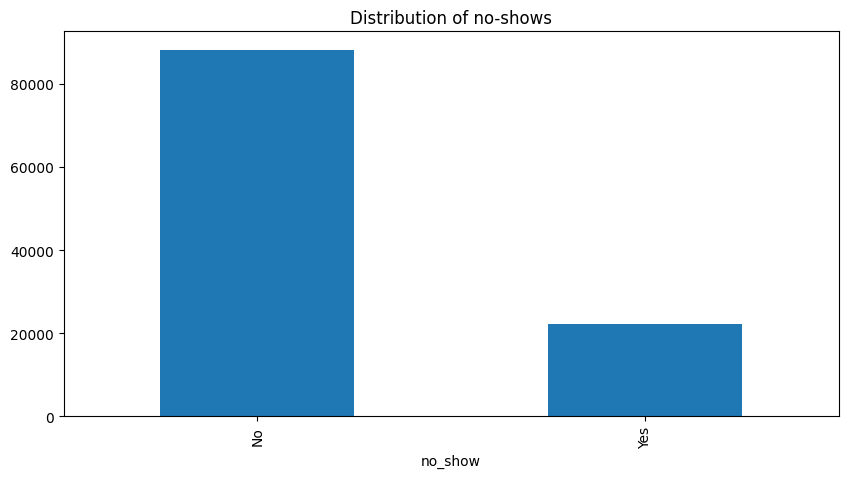

In [4165]:
df["no_show"].value_counts().plot(
    kind="bar", figsize=(10, 5), title="Distribution of no-shows"
)

The data is imbalanced, There's a significant difference between the showing and non-showing results. which may affect the accuracy of the conclusions.


now let's create new column represents the difference between the appointment day and scheduled day.


In [4166]:
df_demographic = df.copy() # create a copy of the original dataframe for demographic analysis on next section
df = df.copy()

df["days_to_appointment"] = (df["appointment_day"] - df["scheduled_day"]).dt.days
df["days_to_appointment"].describe()

count   110526
mean         9
std         15
min         -7
25%         -1
50%          3
75%         14
max        178
Name: days_to_appointment, dtype: float64

There's a negative values, which means there was some appointments was scheduled after the appointment day which is not logical, so we will assume that it was wrong data entry and filter them.


In [4167]:
df = df.query("days_to_appointment >= 0")
df["days_to_appointment"].describe()

count   71959
mean       15
std        16
min         0
25%         3
50%         8
75%        21
max       178
Name: days_to_appointment, dtype: float64

Now let's show the distribution of the waiting days


C:\Users\obada\AppData\Local\Temp\ipykernel_9044\371802059.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_filtered.groupby("no_show")["days_to_appointment"].plot(


no_show
No     Axes(0.125,0.11;0.775x0.77)
Yes    Axes(0.125,0.11;0.775x0.77)
Name: days_to_appointment, dtype: object

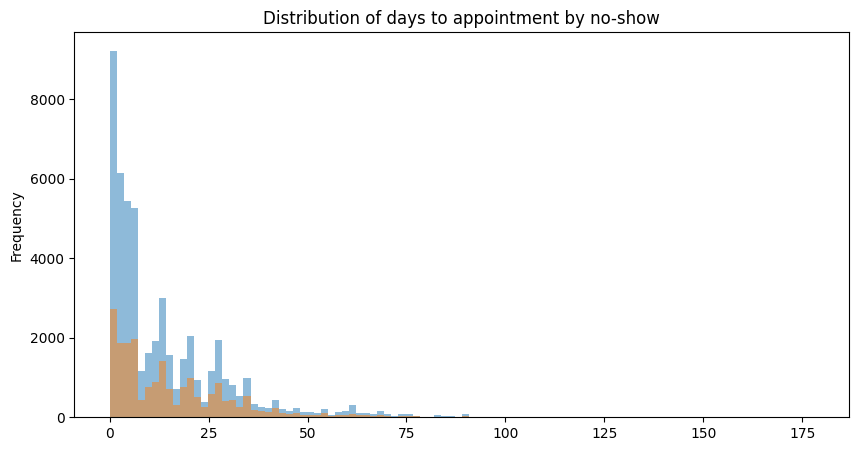

In [4168]:
df_filtered = df.copy()
df_filtered.groupby("no_show")["days_to_appointment"].plot(
    kind="hist",
    bins=100,
    alpha=0.5,
    figsize=(10, 5),
    title="Distribution of days to appointment by no-show",
)

The distribution is highly biased around the 0, lets check for some outliers and remove them.


<Axes: title={'center': 'Boxplot of days to appointment'}>

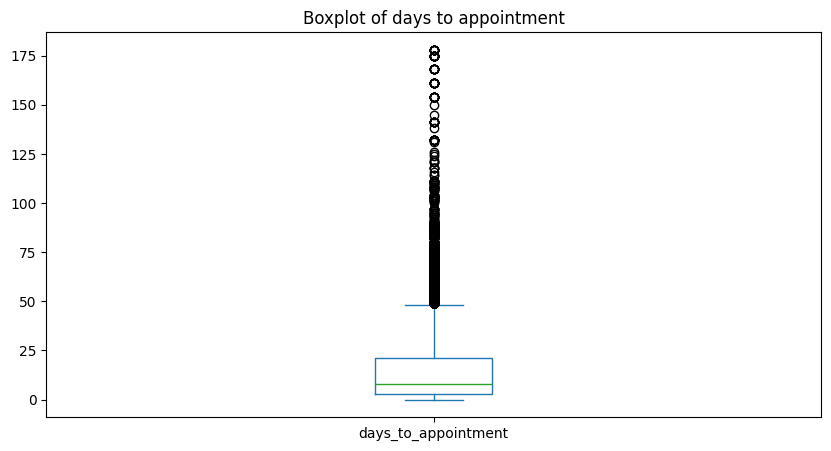

In [4169]:
df_filtered["days_to_appointment"].plot(
    kind="box", figsize=(10, 5), title="Boxplot of days to appointment"
)

As shown in the box plot, there are many outliers which affecting our data, let's remove them by calculating the threshold and filter them according to it.


In [4170]:
# Remove extreme outliers
threshold = df["days_to_appointment"].quantile(0.94)
df_filtered = df[df["days_to_appointment"] <= threshold]
df_filtered["days_to_appointment"].describe(), threshold

(count   67792
 mean       12
 std        11
 min         0
 25%         3
 50%         7
 75%        19
 max        42
 Name: days_to_appointment, dtype: float64,
 np.float64(42.0))

checking the outliers to ensure the value of the threshold.


<Axes: title={'center': 'Boxplot of days to appointment (Filtered)'}>

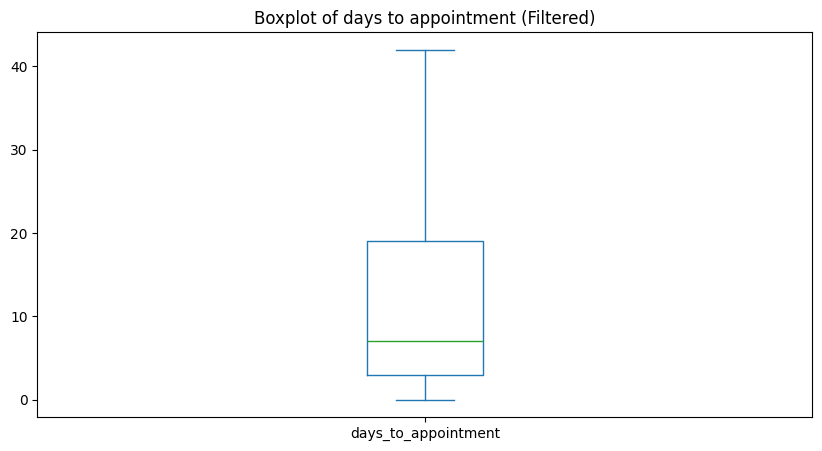

In [4171]:
df_filtered["days_to_appointment"].plot(
    kind="box", figsize=(10, 5), title="Boxplot of days to appointment (Filtered)"
)

now lets display the distribution again.


C:\Users\obada\AppData\Local\Temp\ipykernel_9044\2455066561.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_filtered.groupby("no_show")["days_to_appointment"].plot(


no_show
No     Axes(0.125,0.11;0.775x0.77)
Yes    Axes(0.125,0.11;0.775x0.77)
Name: days_to_appointment, dtype: object

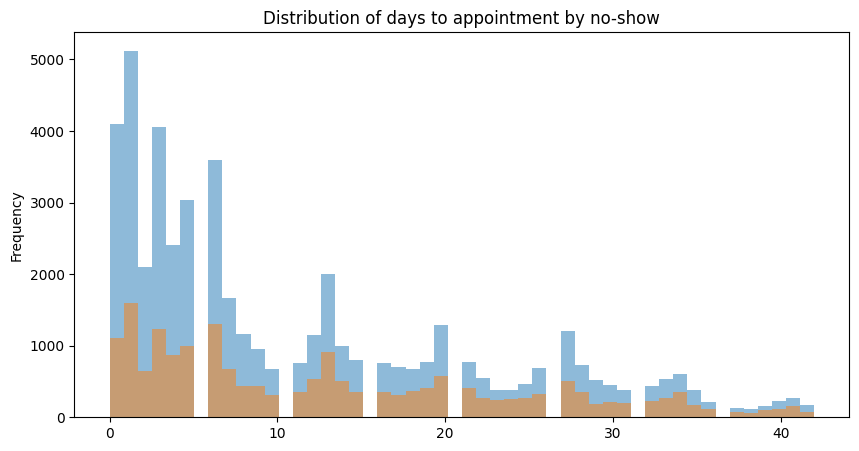

In [4172]:
df_filtered.groupby("no_show")["days_to_appointment"].plot(
    kind="hist",
    bins=50,
    alpha=0.5,
    figsize=(10, 5),
    title="Distribution of days to appointment by no-show",
)

For more accurate analysis, I'm going to show the distributions as stacked bar plot.


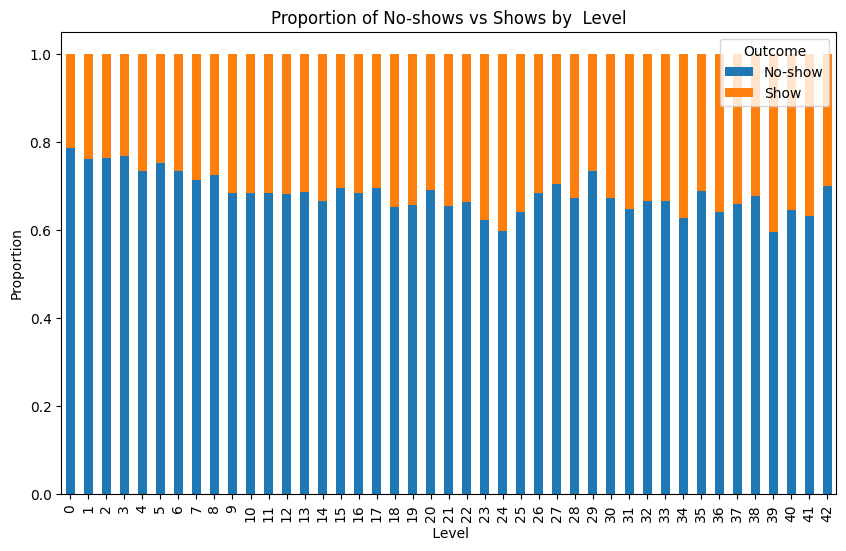

In [4173]:
df_filtered.groupby(
    ["days_to_appointment", "no_show"], observed=False
).size().unstack().div(
    df_filtered.groupby(["days_to_appointment", "no_show"], observed=False)
    .size()
    .unstack()
    .sum(axis=1),
    axis=0,
).plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    title=f"Proportion of No-shows vs Shows by  Level",
)
plt.ylabel("Proportion")
plt.xlabel(f" Level")
plt.legend(["No-show", "Show"], title="Outcome")
plt.show()

This hist plot displays the distributions frequency for each plot more clearer.


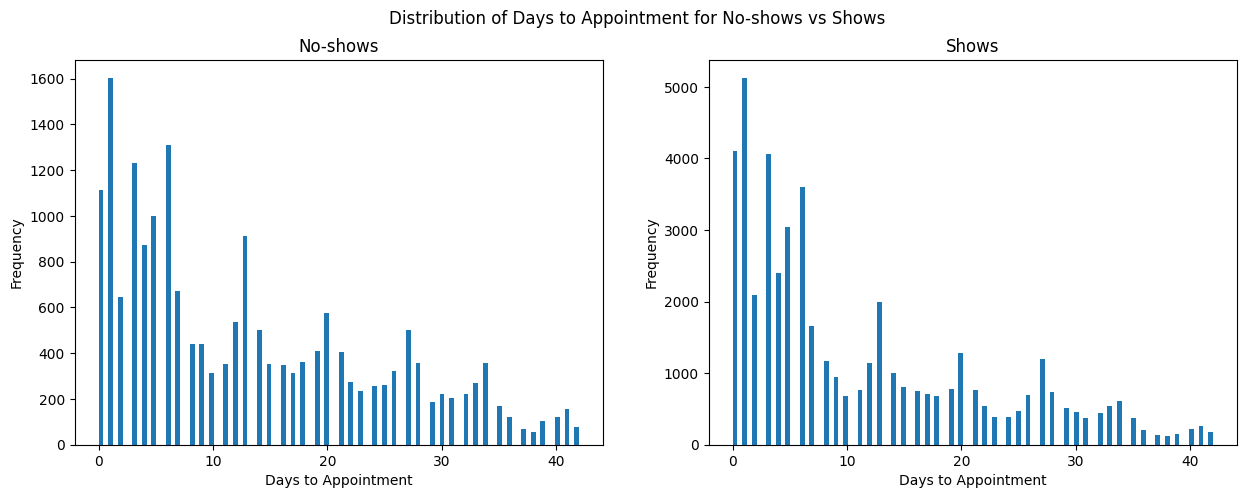

In [4174]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)

df_filtered.query('no_show == "Yes"')["days_to_appointment"].plot(
    kind="hist", bins=100, ax=axes[0], title="No-shows"
)

df_filtered.query('no_show == "No"')["days_to_appointment"].plot(
    kind="hist", bins=100, ax=axes[1], title="Shows"
)

fig.suptitle("Distribution of Days to Appointment for No-shows vs Shows")
axes[0].set_xlabel("Days to Appointment")
axes[1].set_xlabel("Days to Appointment")
axes[0].set_ylabel("Frequency")

plt.show()

In [4175]:
print("No-show:")
print(df_filtered.query('no_show == "Yes"')["days_to_appointment"].describe(), "\n")
print("Show:")
print(df_filtered.query('no_show == "No"')["days_to_appointment"].describe())

No-show:
count   19241
mean       13
std        11
min         0
25%         4
50%        10
75%        21
max        42
Name: days_to_appointment, dtype: float64 

Show:
count   48551
mean       11
std        11
min         0
25%         3
50%         6
75%        18
max        42
Name: days_to_appointment, dtype: float64


C:\Users\obada\AppData\Local\Temp\ipykernel_9044\3369625210.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_filtered.groupby(["days_to_appointment", "no_show"]).size().unstack(fill_value=0)


<Axes: title={'center': 'Proportion of No-shows vs Shows by Days to Appointment'}, xlabel='show', ylabel='no-show'>

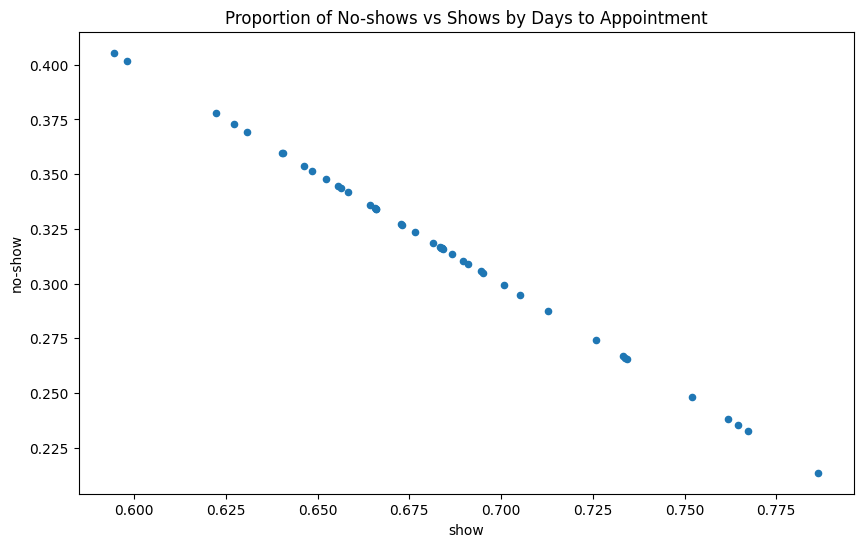

In [4176]:
proportions = (
    df_filtered.groupby(["days_to_appointment", "no_show"]).size().unstack(fill_value=0)
)
proportions = proportions.div(proportions.sum(axis=1), axis=0)

proportions.columns = ["show", "no-show"]

proportions.plot.scatter(
    x="show",
    y="no-show",
    figsize=(10, 6),
    title="Proportion of No-shows vs Shows by Days to Appointment",
)

The majority of **no-shows** tend to have shorter **days_to_appointment**, mostly clustered **between 0 to 10 days**. There is a noticeable **drop** in frequency as the **days_to_appointment** **increases**. The further away the appointment is scheduled, the fewer no-shows there are.

For those who showed up, there is also a higher concentration of appointments scheduled within the first 0 to 10 days. However, unlike the no-show group, there are relatively more people showing up even when the appointments are scheduled further in advance (e.g., up to 40 days).

Both groups show a higher concentration of appointments with shorter lead times (days_to_appointment closer to 0). This is expected since people are generally more likely to keep appointments that are scheduled soon rather than those that are weeks away.
However, the no-show rate seems to decline more sharply as the days_to_appointment increases, suggesting that patients are more likely to miss appointments scheduled far in advance.
This trend implies that longer lead times may increase the likelihood of no-shows, possibly because patients forget, lose interest, or encounter scheduling conflicts over time.

**Based on the histograms, days_to_appointment does appear to affect the no-show rate.** Specifically:

Appointments scheduled with shorter notice (0-10 days) are more likely to be attended.
As the days to the appointment increase, the likelihood of patients not showing up increases, although those who do show up are relatively consistent even with longer scheduling times.


### Research Question 2: Demographic Analysis

Objective: Determine whether age, gender, scholarship, or neighborhood influences no-show rates.


In order to get better results, I've used the original cleaned data rather than using the data filtered in the previous section.


In [4177]:
df_demographic["no_show"].value_counts()

no_show
No     88207
Yes    22319
Name: count, dtype: int64

I've created a function to plot a bar plot for a specific column.


In [4178]:
# shows a warning about the title parameter, but it works fine, I choosed the notmal plot_demographic function to avoid the warning
# def plot_demographic_groupby(column, title, rows=1, cols=2, figsize=(15, 5), sharey=True, sharex=False):
#     fig, axes = plt.subplots(rows, cols, figsize=figsize, sharey=sharey, sharex=sharex)

#     df_demographic.query('no_show == "Yes"').groupby(df_demographic['no_show'])[column].count().plot(
#         kind=title,
#         ax=axes[0],
#         title="No-shows",
#     )
#     axes[0].set_xlabel(column.capitalize())
#     axes[0].set_ylabel("Frequency")

#     df_demographic.query('no_show == "No"').groupby(df_demographic['no_show'])[column].count().plot(
#         kind=title,
#         ax=axes[1],
#         title="Shows",
#     )
#     axes[1].set_xlabel(column.capitalize())
#     axes[1].set_ylabel("Frequency")

#     fig.suptitle(f"Distribution of No-shows vs Shows by {column.capitalize()}", y=1)
#     plt.tight_layout()
#     plt.show()


def plot_bar(column, title, rows=1, cols=2, figsize=(15, 5), sharey=True, sharex=False):
    fig, axes = plt.subplots(rows, cols, figsize=figsize, sharey=sharey, sharex=sharex)

    df_demographic.query('no_show == "Yes"')[column].value_counts().plot(
        kind=title,
        ax=axes[0],
        title="No-shows",
    )
    axes[0].set_xlabel(column.capitalize())
    axes[0].set_ylabel("Frequency")

    df_demographic.query('no_show == "No"')[column].value_counts().plot(
        kind=title,
        ax=axes[1],
        title="Shows",
    )
    axes[1].set_xlabel(column.capitalize())
    axes[1].set_ylabel("Frequency")

    fig.suptitle(f"Distribution of No-shows vs Shows by {column.capitalize()}", y=1)
    plt.tight_layout()
    plt.show()

Same idea but to plot hist plot


In [4179]:
def plot_hist(
    column, title, rows=1, cols=2, figsize=(15, 5), sharey=True, sharex=False
):
    fig, axes = plt.subplots(rows, cols, figsize=figsize, sharey=sharey, sharex=sharex)

    df_demographic.query('no_show == "Yes"')[column].plot(
        kind=title, bins=100, ax=axes[0], title="No-shows"
    )

    df_demographic.query('no_show == "No"')[column].plot(
        kind="hist", bins=100, ax=axes[1], title="Shows"
    )

    fig.suptitle(f"Distribution of {column.capitalize()} for No-shows vs Shows")
    axes[0].set_xlabel(column.capitalize())
    axes[1].set_xlabel(column.capitalize())
    axes[0].set_ylabel("Frequency")

    plt.show()

Displaying the distribution for age.


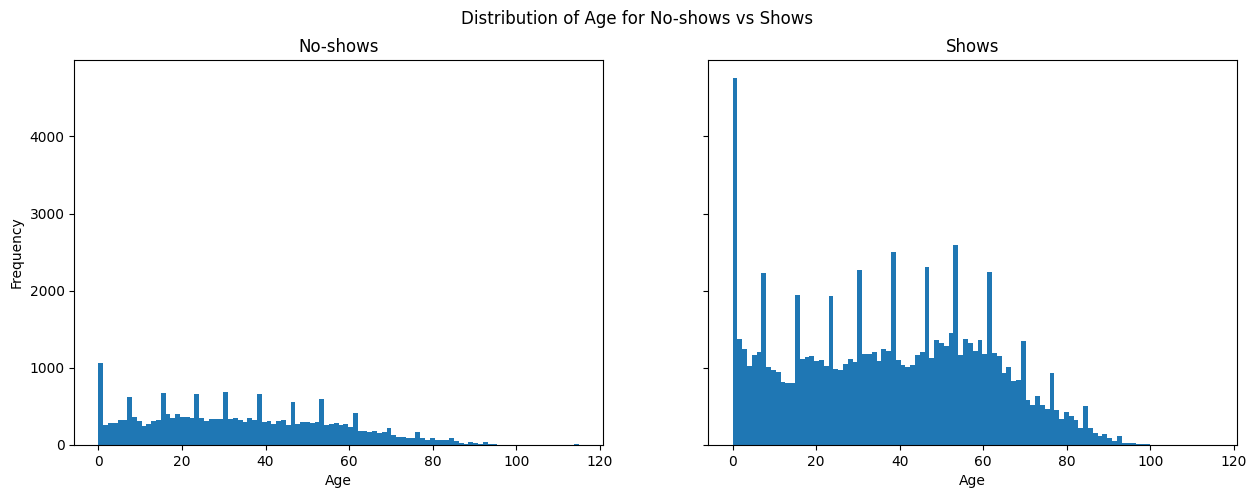

In [4180]:
plot_hist("age", "hist")

The ages seems to be grouped in clusters, it would be easier to display them in single plot to identify the clusters.


C:\Users\obada\AppData\Local\Temp\ipykernel_9044\1686487322.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_filtered.groupby("no_show")["age"].plot(


no_show
No     Axes(0.125,0.11;0.775x0.77)
Yes    Axes(0.125,0.11;0.775x0.77)
Name: age, dtype: object

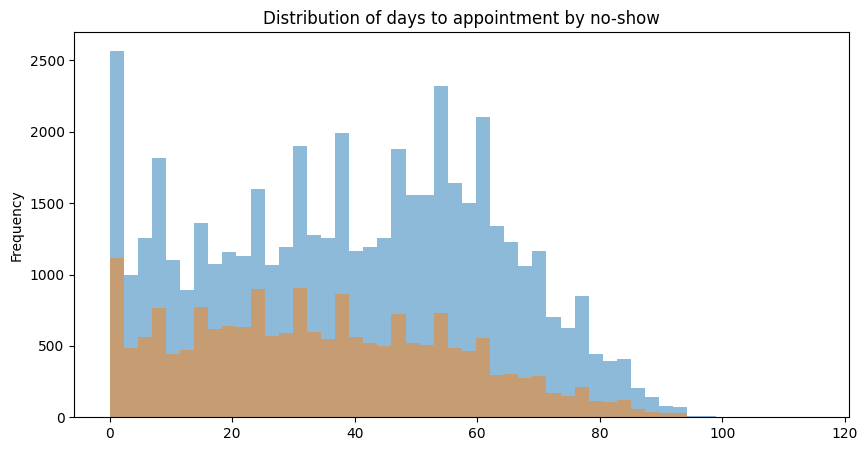

In [4181]:
df_filtered.groupby("no_show")["age"].plot(
    kind="hist",
    bins=50,
    alpha=0.5,
    figsize=(10, 5),
    title="Distribution of days to appointment by no-show",
)

The ages seems to be **clustered** almost around 0 (New born children), 5, 15, 25, 30, 38, 45, 63, 70, 78, and 83. The age **clusters** may suggest certain life **stages** where attendance patterns **differ**. For example, parents of young children (around 0 and 5) might have different attendance behavior compared to teenagers (around 15) or adults (around 25-45). Seniors (around 70-83) could also have unique attendance patterns due to health or mobility issues.


Now Let's move to analyze the gender attribute.


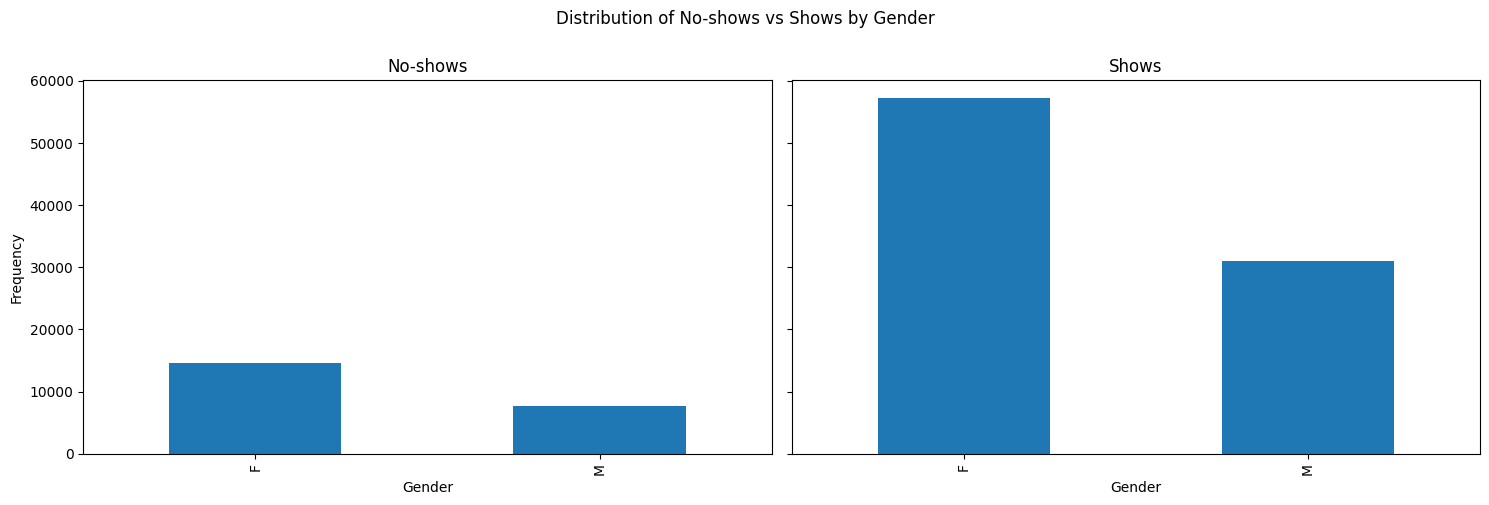

In [4182]:
plot_bar("gender", "bar")

The distribution of females versus male is normal since the females tends to care about theirselves more than males.


In [4183]:
def proportion_of_no_show(column):
    df_demographic.groupby([column, "no_show"], observed=False).size().unstack(
        fill_value=0
    ).div(
        df_demographic.groupby([column, "no_show"], observed=False)
        .size()
        .unstack()
        .sum(axis=1),
        axis=0,
    ).plot(
        kind="bar",
        stacked=True,
        figsize=(10, 6),
        title=f"Proportion of No-shows vs Shows by {column.capitalize()} Level",
    )
    plt.ylabel("Proportion")
    plt.xlabel(f"{column.capitalize()} Level")
    plt.legend(["No-show", "Show"], title="Outcome")
    plt.show()

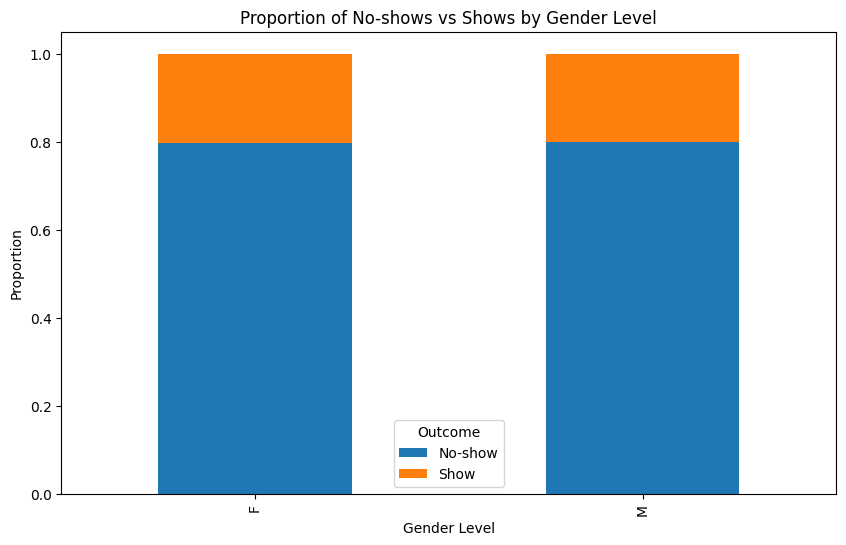

In [4184]:
proportion_of_no_show("gender")

According to the stack bar, the gender doesn't affect the no-showing probability, since they are equally with the attidued.


Moving to the scholarship analysis, we need to determine if the low income could affect the attendence.


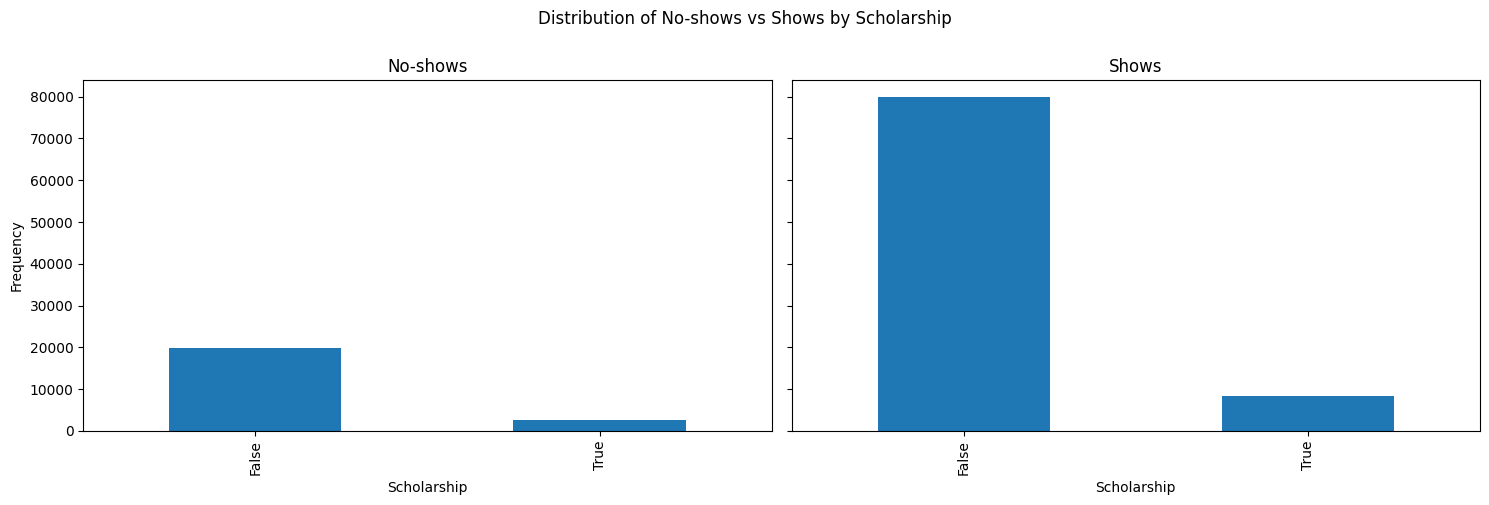

In [4185]:
plot_bar("scholarship", "bar")

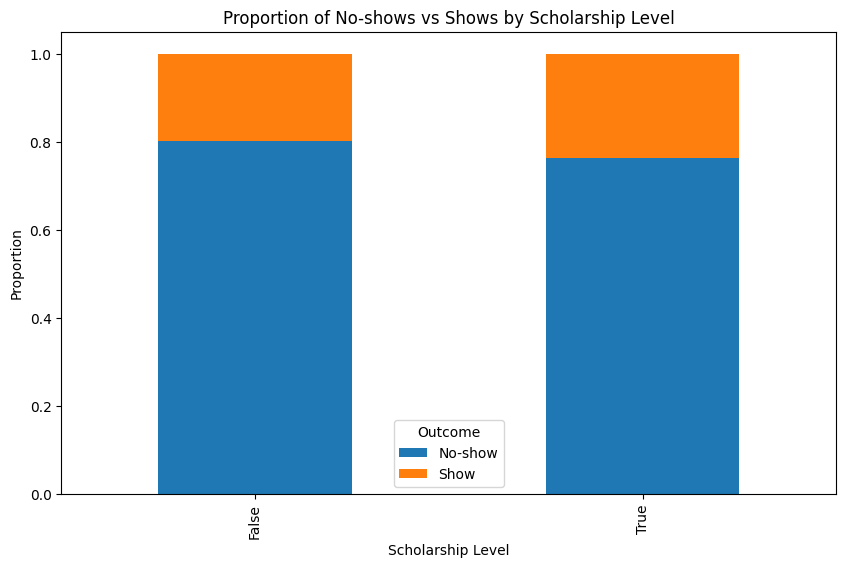

In [4186]:
proportion_of_no_show("scholarship")

The analysis shows that low income has a small effect on no-show rates. While scholarship recipients tend to show up for appointments slightly less than non-recipients, the difference is minimal. This suggests that other factors, like health conditions or appointment reminders, might have a bigger impact on reducing no-shows than income alone.


Moving to the neighborhood analysis, we will first check the distribution of no-shows by neighborhood.


First i want to see which neiborhood the majority belongs.


In [4187]:
df_demographic["neighbourhood"].value_counts().rank(ascending=False)

neighbourhood
JARDIM CAMBURI                 1
MARIA ORTIZ                    2
RESISTÊNCIA                    3
JARDIM DA PENHA                4
ITARARÉ                        5
                              ..
ILHA DO BOI                   77
ILHA DO FRADE                 78
AEROPORTO                     79
ILHAS OCEÂNICAS DE TRINDADE   80
PARQUE INDUSTRIAL             81
Name: count, Length: 81, dtype: float64

Now display the distribution for each neiborhood attendence rate.


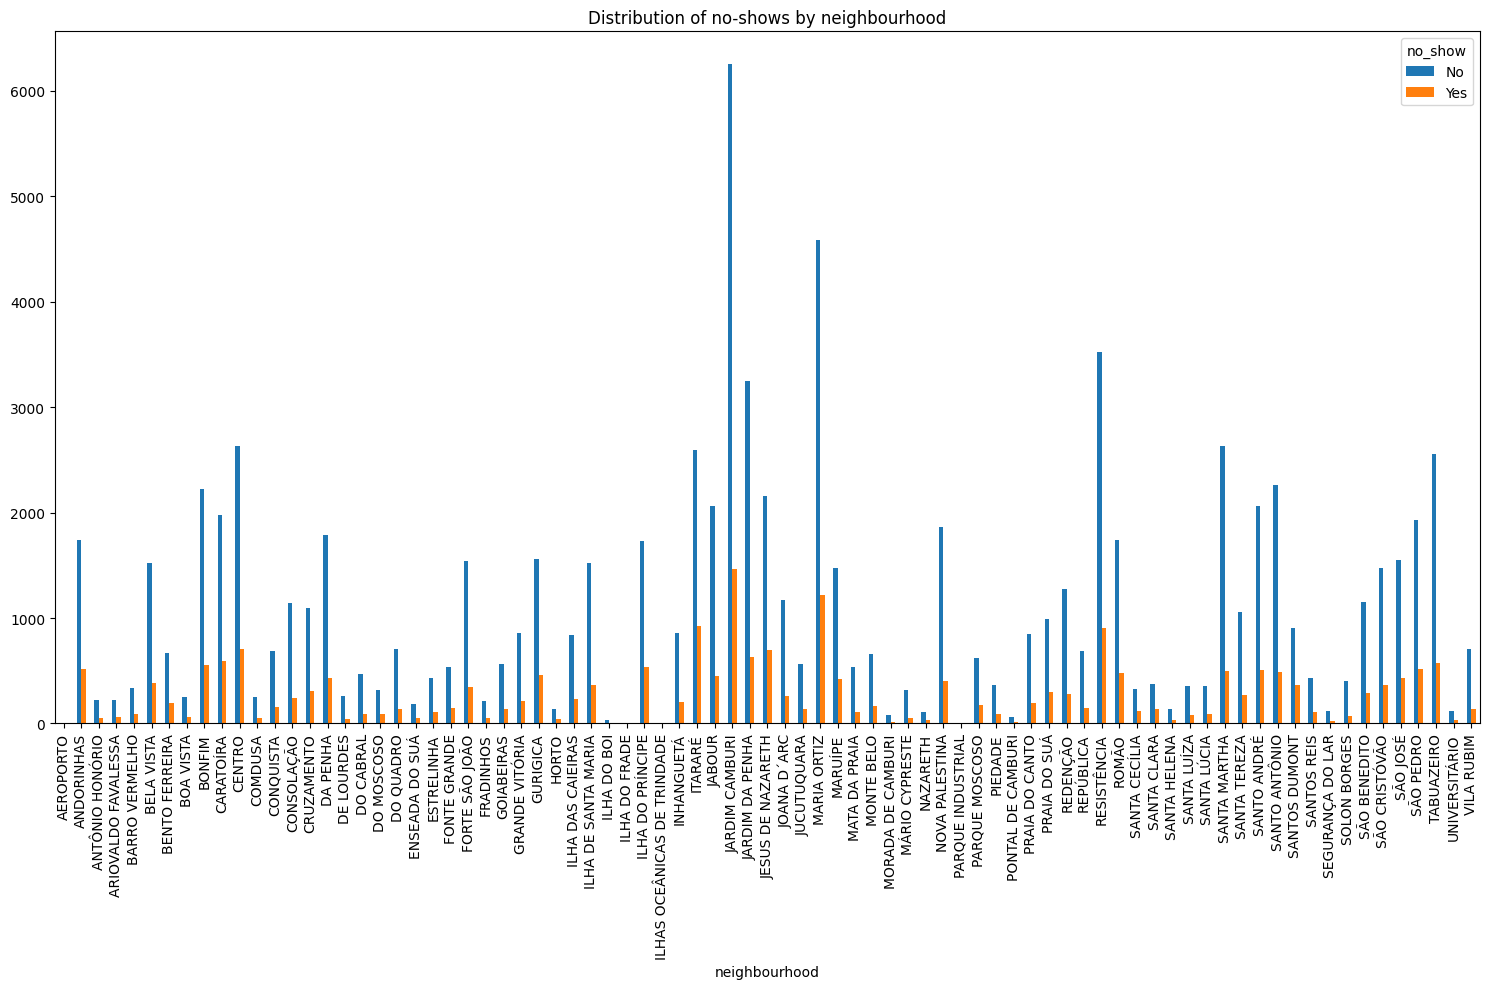

In [4188]:
# plot_bar('neighbourhood', 'bar', figsize=(15, 15), rows=2, cols=1, sharey=True)

df_demographic.groupby("neighbourhood")["no_show"].value_counts().unstack().plot(
    kind="bar", figsize=(15, 10), title="Distribution of no-shows by neighbourhood"
)

plt.tight_layout()

I will now calculate the attendance percentage for each neighborhood and display the results in a histogram.


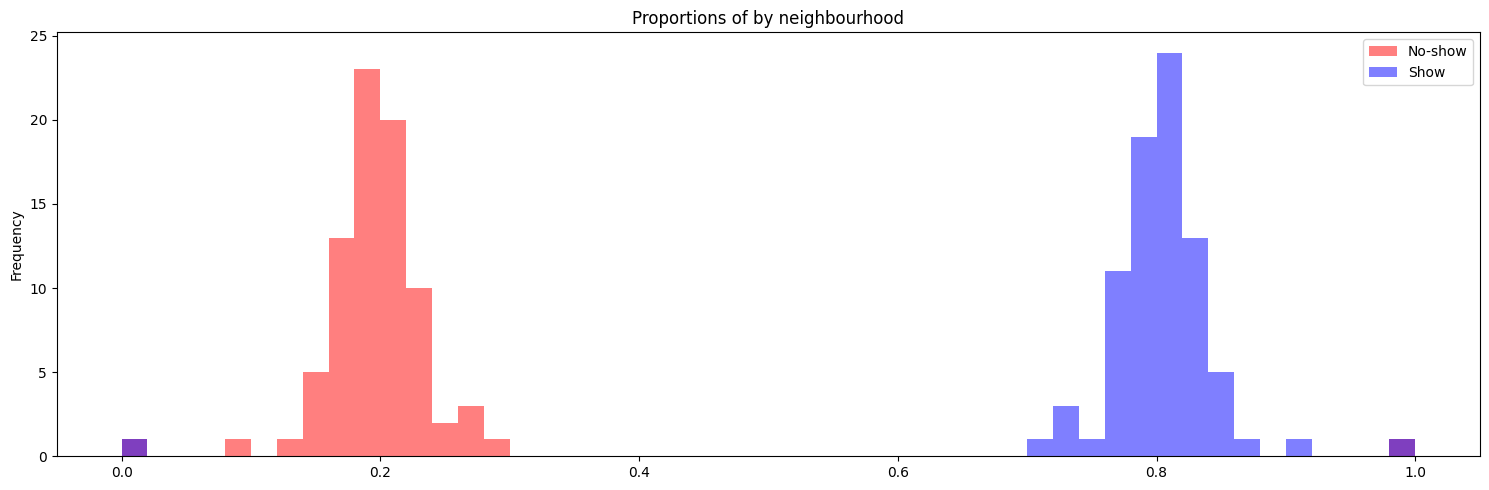

In [4189]:
df_demographic.groupby("neighbourhood")["no_show"].apply(
    lambda x: (x == "Yes").sum() / x.count()
).plot(
    kind="hist",
    bins=50,
    figsize=(15, 5),
    title="Proportion of by neighbourhood",
    legend=True,
    alpha=0.5,
    color="red",
)

df_demographic.groupby("neighbourhood")["no_show"].apply(
    lambda x: (x == "No").sum() / x.count()
).plot(
    kind="hist",
    bins=50,
    figsize=(15, 5),
    title="Proportions of by neighbourhood",
    legend=True,
    alpha=0.5,
    color="blue",
)

plt.legend(["No-show", "Show"])
plt.tight_layout()

The **Neighborhood** attribute provides limited insight:

- **Economic Status**: Economic conditions are already covered by the Scholarship attribute, making **Neighborhood** somewhat redundant for this purpose.

- **Distance to Hospital/City Center**: Distance isn’t measurable without more precise location data, limiting its usefulness in assessing no-show probability.

Basic questions I will address:

- **Average age for missed appointments by neighborhood?**
- **Patient distribution by neighborhood?**

But not that much in analysis. Since **no-show** rates are evenly distributed across neighborhoods, **Neighborhood doesn’t** significantly **impact** no-show probability.


In [4190]:
# df_percentages = df_demographic.groupby('neighbourhood')['no_show'].value_counts(normalize=True).unstack() * 100
# print(len(df_percentages.index), df_percentages.index)
# for neighborhood in df_percentages.index:
#     neighborhood_data = df_percentages.loc[neighborhood, ['Yes', 'No']]

#     neighborhood_data.plot(
#         kind='pie',
#         autopct='%1.1f%%',
#         labels=['No-shows', 'Shows'],
#         startangle=90,
#         legend=False,
#         title=f"No-shows Distribution for {neighborhood}",
#         figsize=(5, 5)
#     )
#     plt.tight_layout()
#     plt.show()

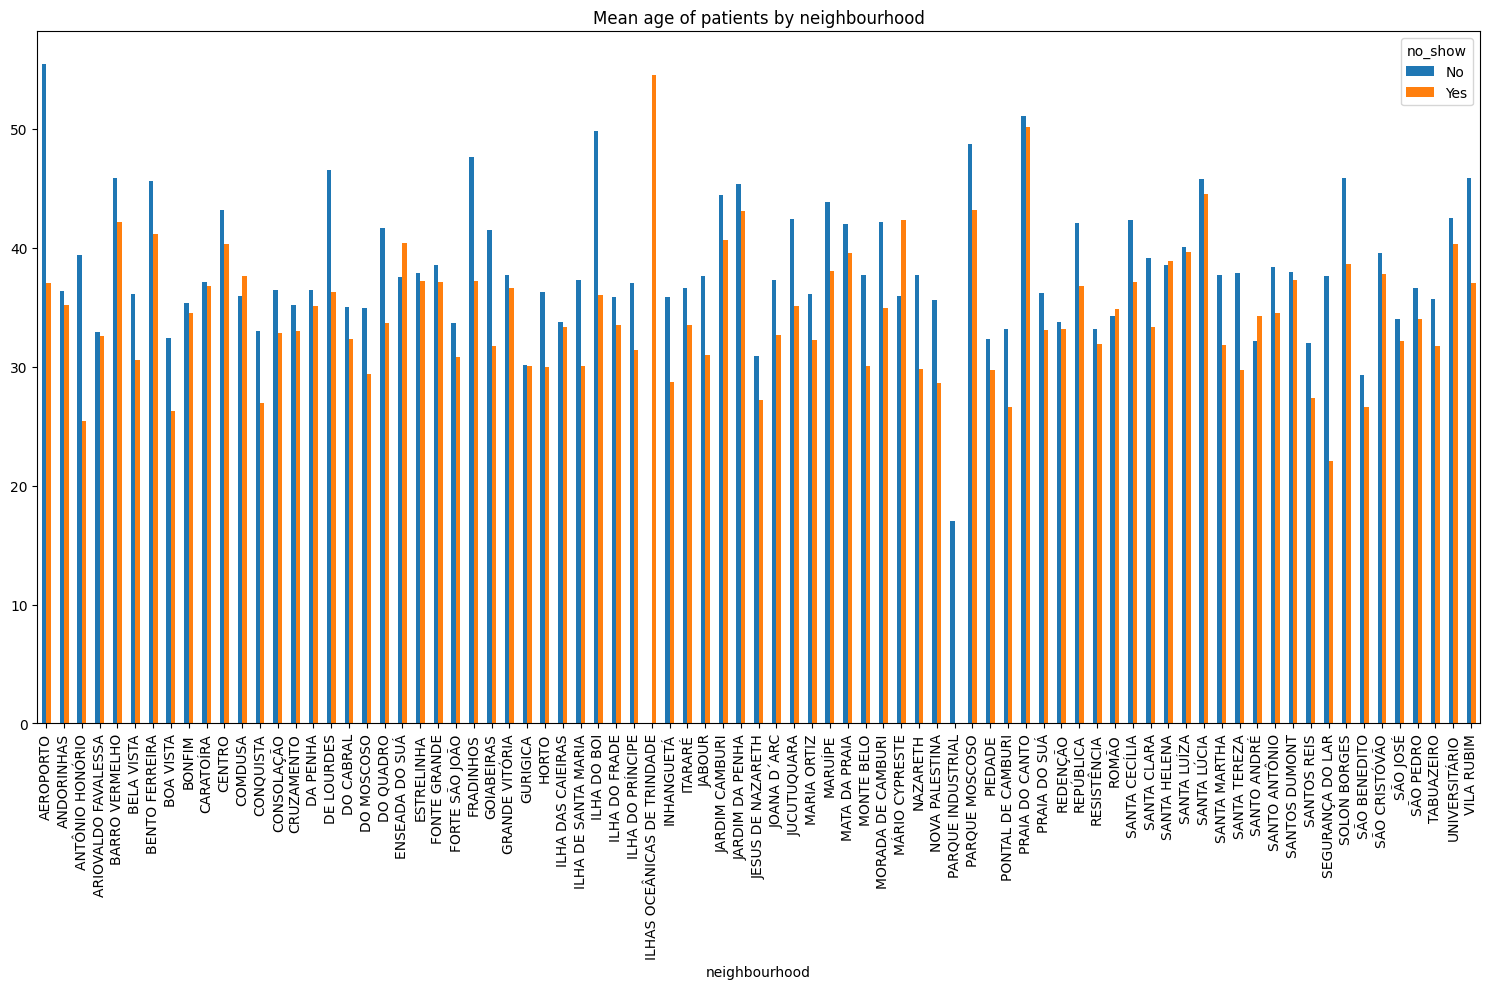

In [4191]:
df_demographic.groupby(["neighbourhood", "no_show"], observed=False)[
    "age"
].mean().unstack().plot(
    kind="bar", figsize=(15, 10), title="Mean age of patients by neighbourhood"
)

plt.tight_layout()

### Research Question 3: Impact of SMS Reminders

Objective: Assess whether receiving an SMS reminder reduces the posibility of no-shows.


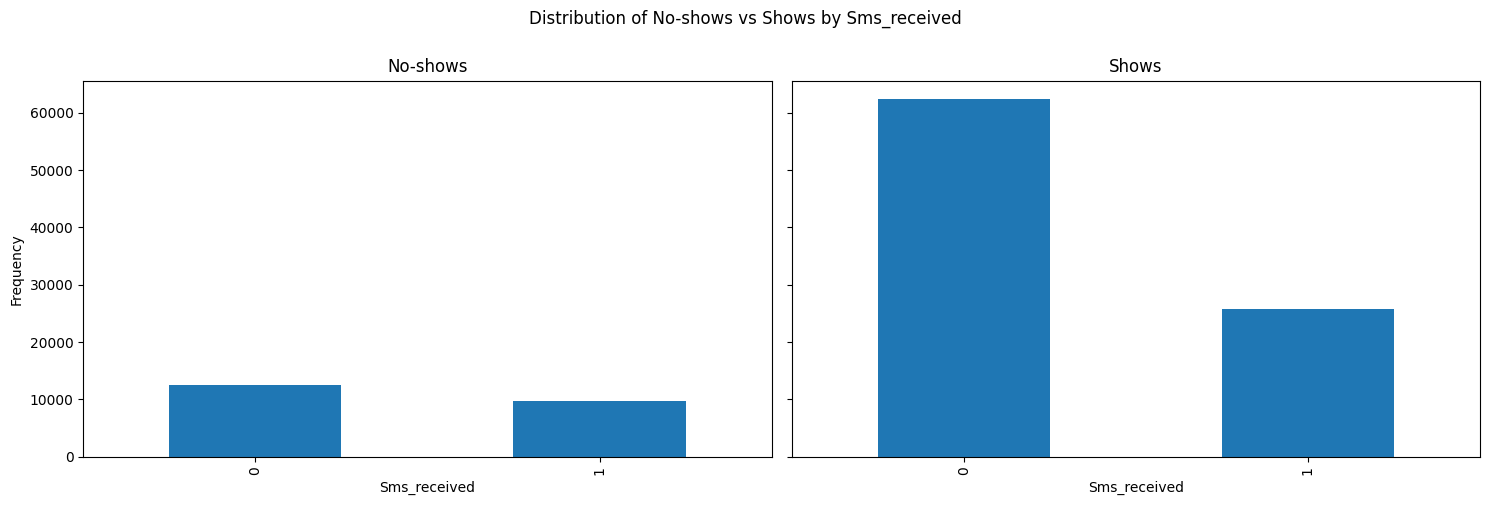

In [4192]:
plot_bar("sms_received", "bar")

<Axes: title={'center': 'Proportion of No-shows vs Shows by SMS Received Level'}, xlabel='sms_received'>

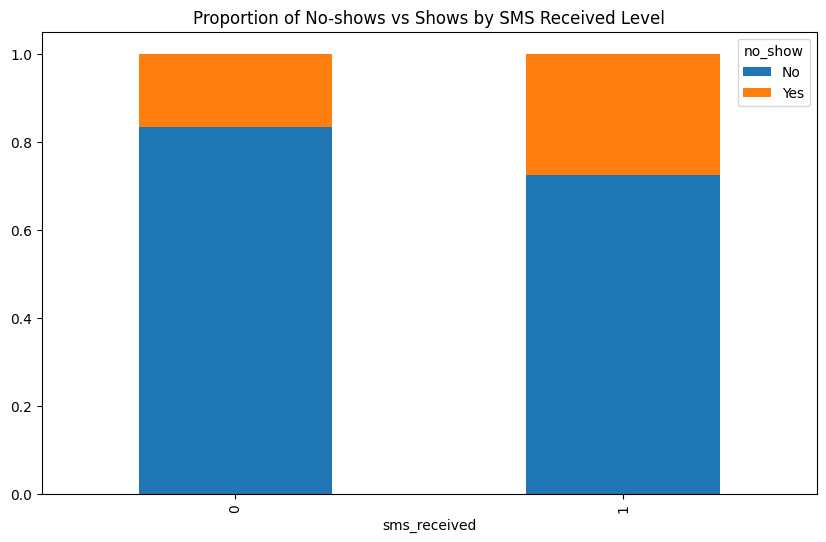

In [4193]:
df_demographic.groupby(
    ["sms_received", "no_show"], observed=False
).size().unstack().div(
    df_demographic.groupby(["sms_received", "no_show"], observed=False)
    .size()
    .unstack()
    .sum(axis=1),
    axis=0,
).plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    title=f"Proportion of No-shows vs Shows by SMS Received Level",
)

The previous plot shows that reciving sms doesn't really hellp on increasing the attendence rate.

### Research Question 4: Exploring Health Factors

Objective: Examine how conditions like hypertension, diabetes, alcoholism, and handcap affect the no-show rates.


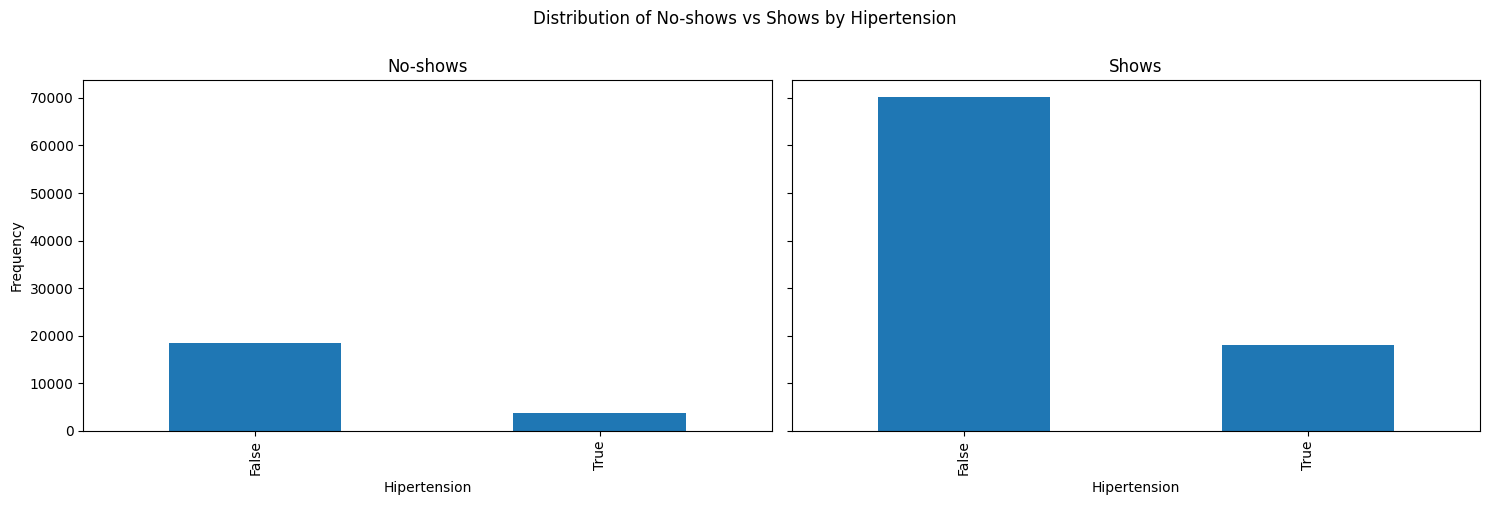

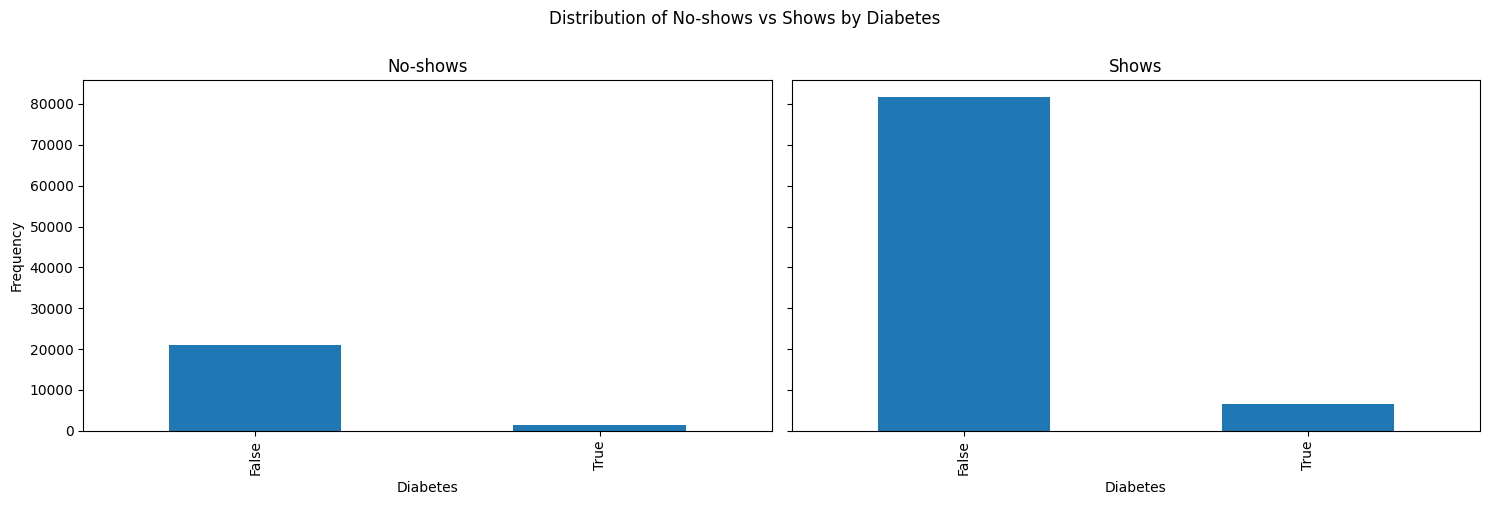

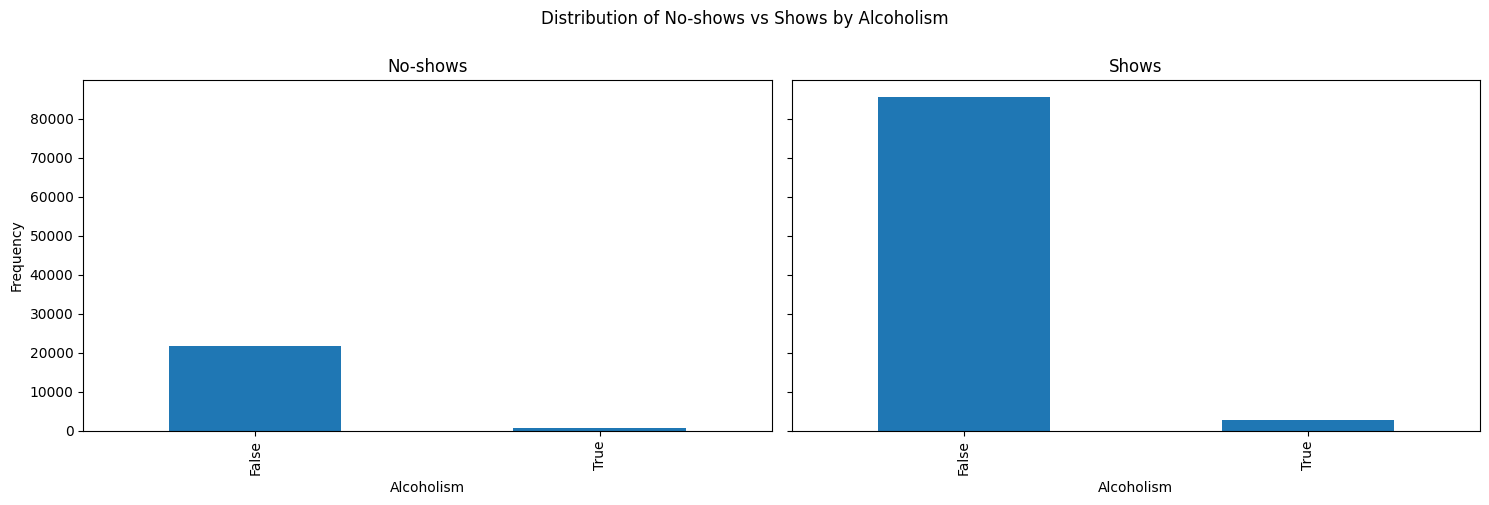

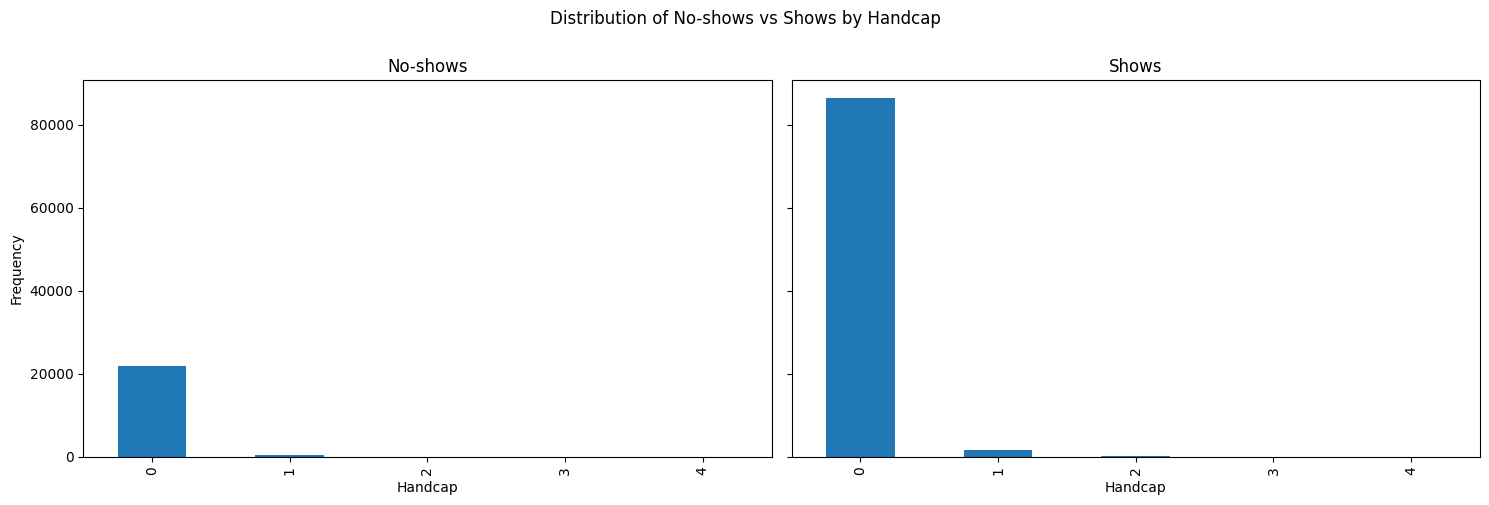

In [4194]:
health_columns = ["hipertension", "diabetes", "alcoholism", "handcap"]
for column in health_columns:
    plot_bar(column, "bar")

In [4195]:
df_demographic["handcap"] = df_demographic["handcap"].astype(bool)
df_demographic["handcap"].value_counts()

handcap
False    108285
True       2241
Name: count, dtype: int64

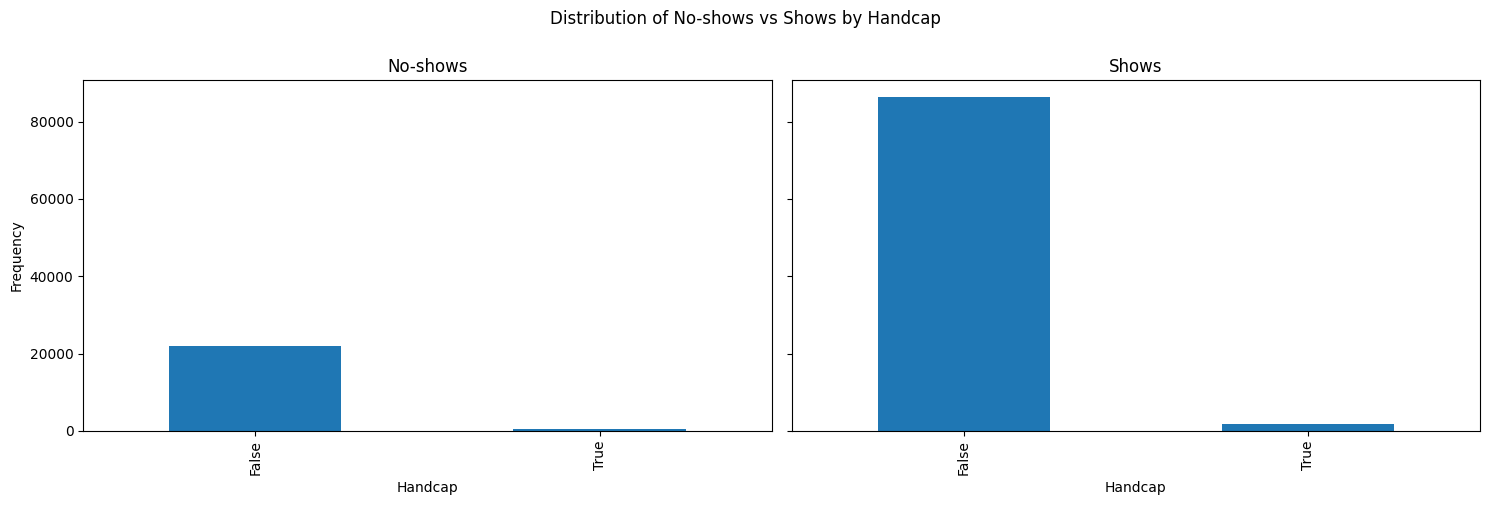

(None,
 no_show  handcap
 No       False      86373
          True        1834
 Yes      False      21912
          True         407
 Name: count, dtype: int64,
 handcap
 False    108285
 True       2241
 Name: count, dtype: int64)

In [4196]:
(
    plot_bar("handcap", "bar"),
    df_demographic["handcap"]
    .groupby(df_demographic["no_show"], observed=True)
    .value_counts(),
    df_demographic["handcap"].value_counts(),
)

The **handcap** data is very unbalanced, with many more patients who have no disability. To make the analysis fairer, I calculated the percentage of no-shows for each handcap level instead of using raw counts.


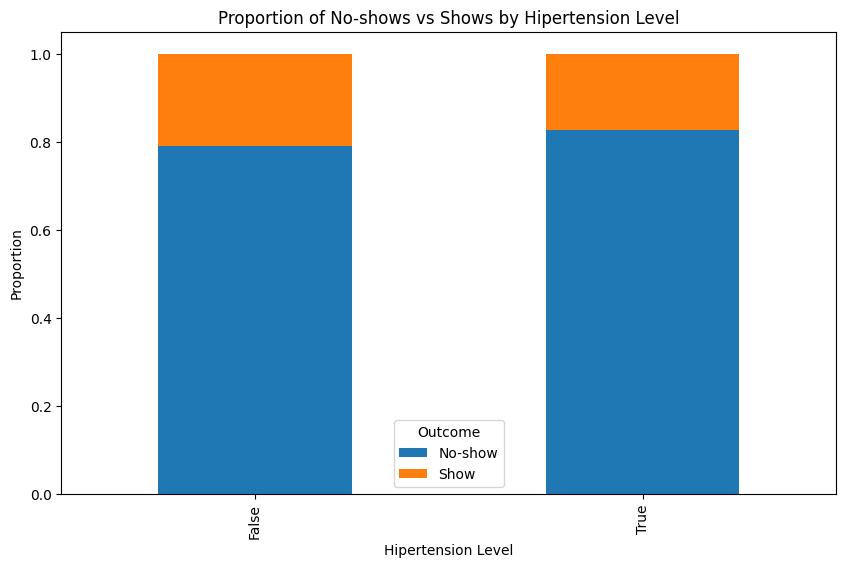

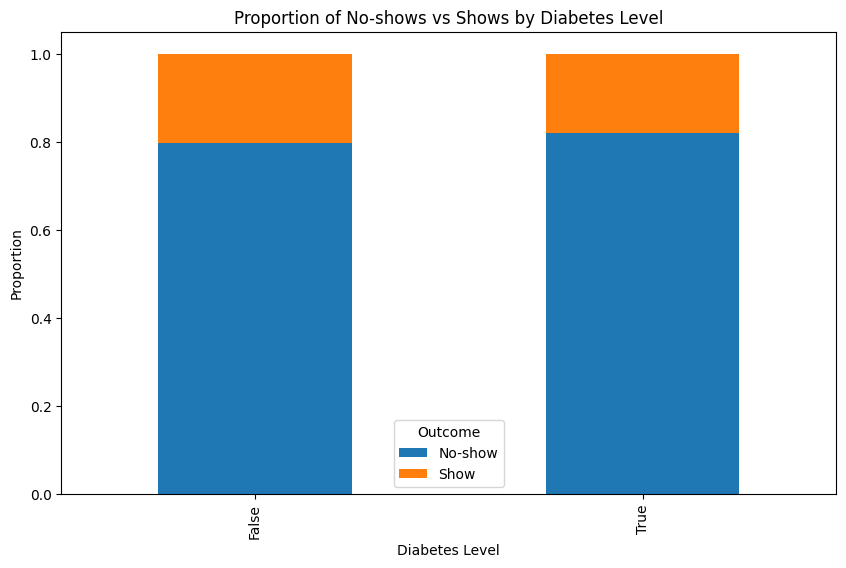

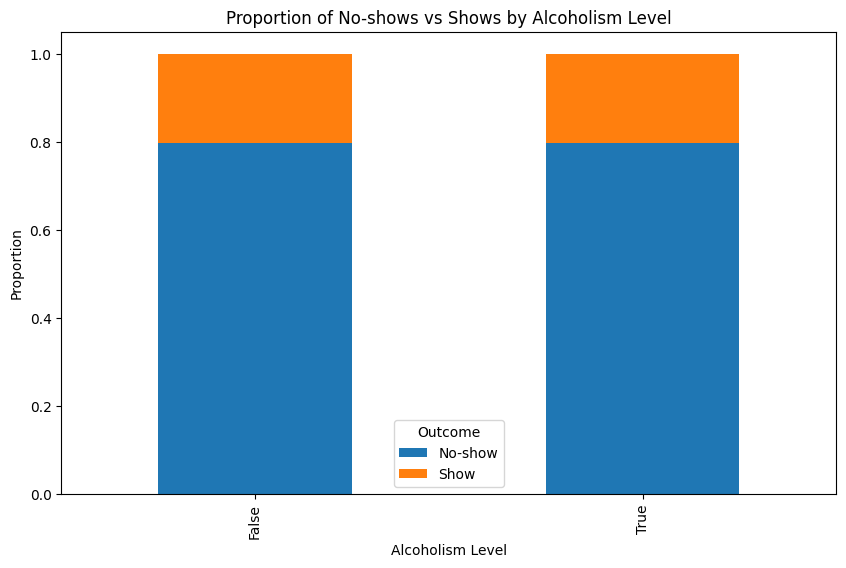

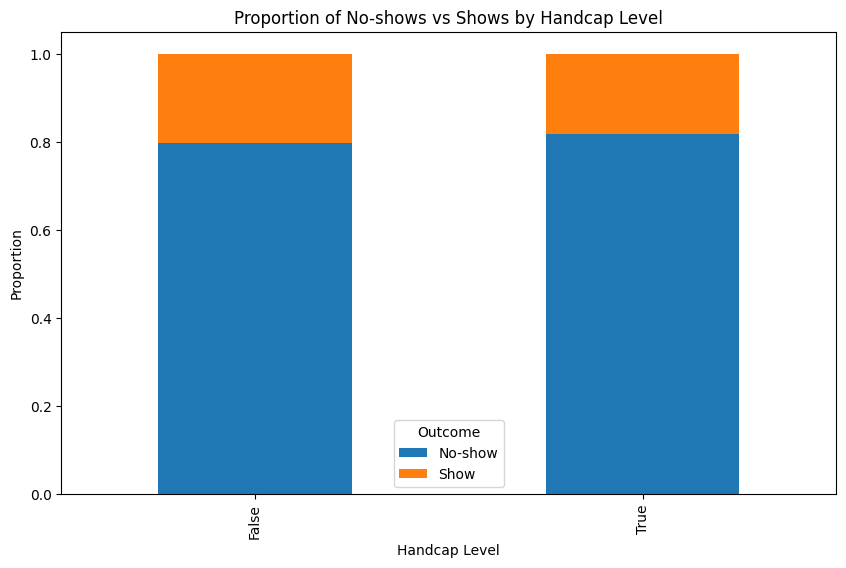

In [4197]:
health_columns = ["hipertension", "diabetes", "alcoholism", "handcap"]
for column in health_columns:
    proportion_of_no_show(column)

The chart shows that being **handcap** doesn't seem to change the chance of a patient missing their appointment, as the no-show rates look similar across different **handcap** levels. However, further verification, such as balancing the dataset, is needed for a more accurate result.

Similarly, other health conditions like hypertension, alcoholism, and diabetes also don’t seem to have much effect on whether patients attend their appointments.

Next Steps:
Adjust the data to ensure fair comparisons.
Test further to confirm these findings.
Check if a combination of health issues influences no-show rates.


<a id='conclusions'></a>

## Conclusions

In conclusion, the analysis looked at factors that affect patient no-shows. Here are some of my findings:

**Appointment Timing**: Patients are more likely to attend if appointments are scheduled within 0–10 days. Longer lead times increase no-shows.

**Age**: Certain age groups, like young children, teenagers, and seniors, show different attendance patterns, possibly due to health or life stage needs.

**Gender**: Gender does not affect no-show rates.

**Income (Scholarship)**: Low-income patients show slightly higher no-show rates, but the effect is minor.

**Neiborhood**: Neighborhood has little effect on attendance.

**SMS Reminders**: SMS reminders don’t seem to reduce no-shows.
**Health Conditions**: Disabilities, hypertension, and other health issues don’t strongly impact no-show rates.

One Limitation I've faced is the dataset is imbalanced, and we don’t have enough detail to confirm if one factor causes another. I'll recommend to adjust the data for fair comparisons. This analysis helped answer questions about no-shows, but more data would improve our understanding.

In [4198]:
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 29 image(s).
[NbConvertApp] Writing 1640871 bytes to Investigate_a_Dataset.html


<a id="reference"></a>

## References

[The Dataset](https://www.kaggle.com/datasets/joniarroba/noshowappointments/data)

[How to plot multiple graphs in one figure](https://www.geeksforgeeks.org/plot-multiple-plots-in-matplotlib/)

[Pandas groupby stacked bar plot with percentages](https://www.geeksforgeeks.org/stacked-percentage-bar-plot-in-matplotlib/)
